# Quick start: initializing, adding data, runing and saving your PyWGCNA
首先，确保[安装PyWGCNA](https://github.com/mortazavilab/PyWGCNA#readme).

我建议您在运行PyWGCNA之前先阅读[数据输入、清理和预处理教程]（Data%20format.md）。

然后，从[此处]下载示例数据(https://github.com/mortazavilab/PyWGCNA/raw/main/tutorials/5xFAD_paper.zip)并对其进行减压。

在本教程中，我们将使用[MODEL-AD]中5xFAD小鼠的基因表达矩阵(https://www.model-ad.org/)项目和[本文](https://www.nature.com/articles/s41597-021-01054-y)《科学数据》中有5548个基因和193个样本，分布在四个不同的时间点。


## Setting up the PyWGCNA object

我们使用TPM矩阵来创建PyWGCNA对象。该对象充当一个容器，其中包含RNA-seq数据集的表达数据（即TPM）和分析结果（如聚类或可视化）。有关PyWGCNA对象结构的技术讨论，请查看我们的[GitHub Wiki](https://github.com/mortazavilab/PyWGCNA/wiki). 例如，原始TPM矩阵作为AnnData存储在“GeneExp”类中。

## **Note**

根据机器上的RAM数量，在计算TOM相似性矩阵时可能会出现错误。为了解决这个问题，我们建议从每个类别中删除一两个样本，或者使用另一台具有更多RAM的机器。

**Compatible with PyWGCNA 2.0.0**

In [1]:
import sys
sys.path.insert(0, "/slurm/home/admin/nlp/DL/97-bioinformatics/PyWGCNA")
import PyWGCNA
geneExp = '5xFAD_paper/expressionList.csv'
pyWGCNA_5xFAD = PyWGCNA.WGCNA(name='5xFAD', 
                              species='mus musculus', 
                              geneExpPath=geneExp, 
                              outputPath='',
                              save=True)
pyWGCNA_5xFAD.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...


,ENSMUSG00000000003,ENSMUSG00000000028,ENSMUSG00000000031,ENSMUSG00000000037,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,...,ENSMUSG00000118383,ENSMUSG00000118384,ENSMUSG00000118385,ENSMUSG00000118386,ENSMUSG00000118387,ENSMUSG00000118388,ENSMUSG00000118389,ENSMUSG00000118390,ENSMUSG00000118391,ENSMUSG00000118392
sample_id,,,,,,,,,,,,,,,,,,,,,
X4mo_cortex_F_5xFADHEMI_430,0.0,1.90,0.00,0.13,0.43,22.37,24.24,19.32,33.41,620.45,...,0.75,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.04,0.0
X4mo_cortex_F_5xFADHEMI_431,0.0,1.10,0.06,0.07,0.18,16.99,24.69,23.88,31.40,705.73,...,0.67,0.0,0.55,0.43,0.0,0.0,0.0,0.0,0.00,0.0
X4mo_cortex_F_5xFADHEMI_433,0.0,1.18,0.07,0.13,1.90,20.37,28.06,21.33,32.14,699.50,...,0.91,0.0,0.00,0.19,0.0,0.0,0.0,0.0,0.02,0.0
X4mo_cortex_F_5xFADHEMI_434,0.0,2.18,0.00,0.07,0.31,17.98,21.46,15.06,27.60,639.95,...,0.11,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
X4mo_cortex_F_5xFADHEMI_511,0.0,1.50,0.10,0.14,0.53,18.35,20.18,18.66,26.43,640.55,...,0.64,0.0,1.38,0.00,0.0,0.0,0.0,0.0,0.02,0.0


In [2]:
pyWGCNA_5xFAD

## Pre-processing workflow

PyWGCNA允许您轻松预处理数据，包括删除样本中缺失值太多或低表达的基因（默认情况下，我们建议删除表达低于1 TPM的基因），以及删除缺失值太大的样本。请记住，这些选项可以通过更改“TPMcutoff”和“cut”进行调整`

Pre-processing...
	Detecting genes and samples with too many missing values...


	Done pre-processing..



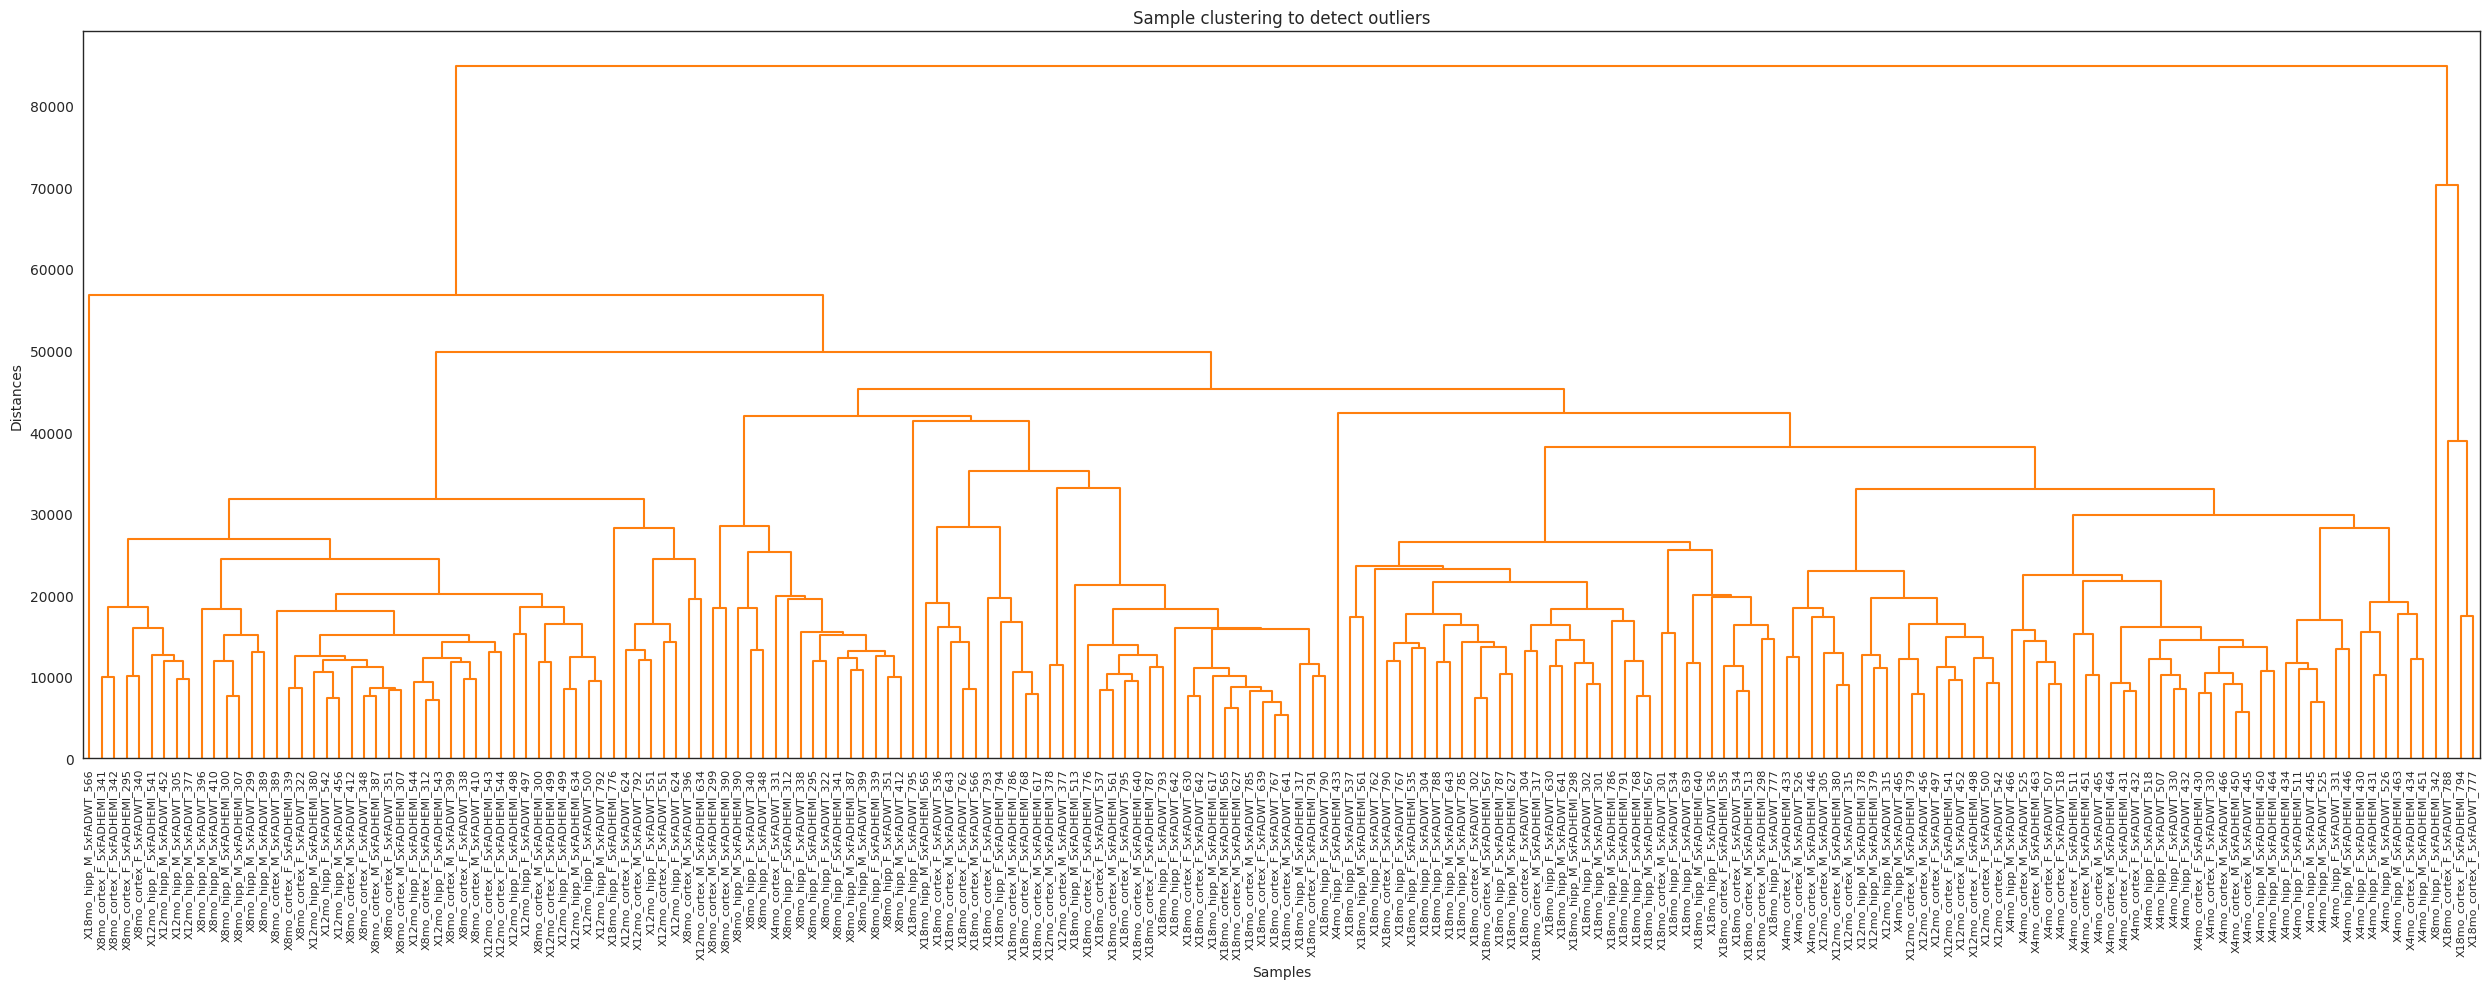

In [3]:
pyWGCNA_5xFAD.preprocess()

In [4]:
dir(pyWGCNA_5xFAD)

['CalculateSignedKME',
 'CoexpressionModulePlot',
 'MEDissThres',
 'MEs',
 'MeanCut',
 'PPI_network',
 'RsquaredCut',
 'TOM',
 'TOMType',
 'TOMsimilarity',
 'TPMcutoff',
 'TomSimilarityFromAdj',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'adjacency',
 'analyseWGCNA',
 'barplotModuleEigenGene',
 'calBlockSize',
 'checkAdjMat',
 'checkAndScaleWeights',
 'checkSets',
 'checkSimilarity',
 'clustOrder',
 'consensusMEDissimilarity',
 'consensusMEDissimilarityMajor',
 'consensusOrderMEs',
 'coreSizeFunc',
 'cut',
 'cutree',
 'cutreeHybrid',
 'datExpr',
 'datME',
 'dynamicMods',
 'equalizeQuantilesFun',
 'figureType',
 'findModules',
 'fixDataStructure',


Pre-processing...
	Detecting genes and samples with too many missing values...


	Done pre-processing..

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1876
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.368857 -0.481613       0.701585  2444.750756  2260.416614   
1       2    0.7253  -0.99165       0.886361   840.665489   673.081241   
2       3  0.791986 -1.194264       0.946969   385.685335   258.451265   
3       4  0.835392   -1.3419       0.968446   207.404152   113.456087   
4       5  0.853842 -1.472183       0.973346   123.232581    54.784481   
5       6  0.870673 -1.553348       0.979584    78.455923     28.47124   
6       7  0.886736 -1.600869       0.986635    52.572016    15.594822   
7       8  0.896672 -1.639343       0.992373     36.65884     9.454046   
8       9  0.903531 -1.677747       0.994643    26.397061     6.024431   
9      10  0.906045 -1.706474       0.995895    19.521431     3.975959   
10     11  0.905582 -1.731076       0.994806    14.767291  

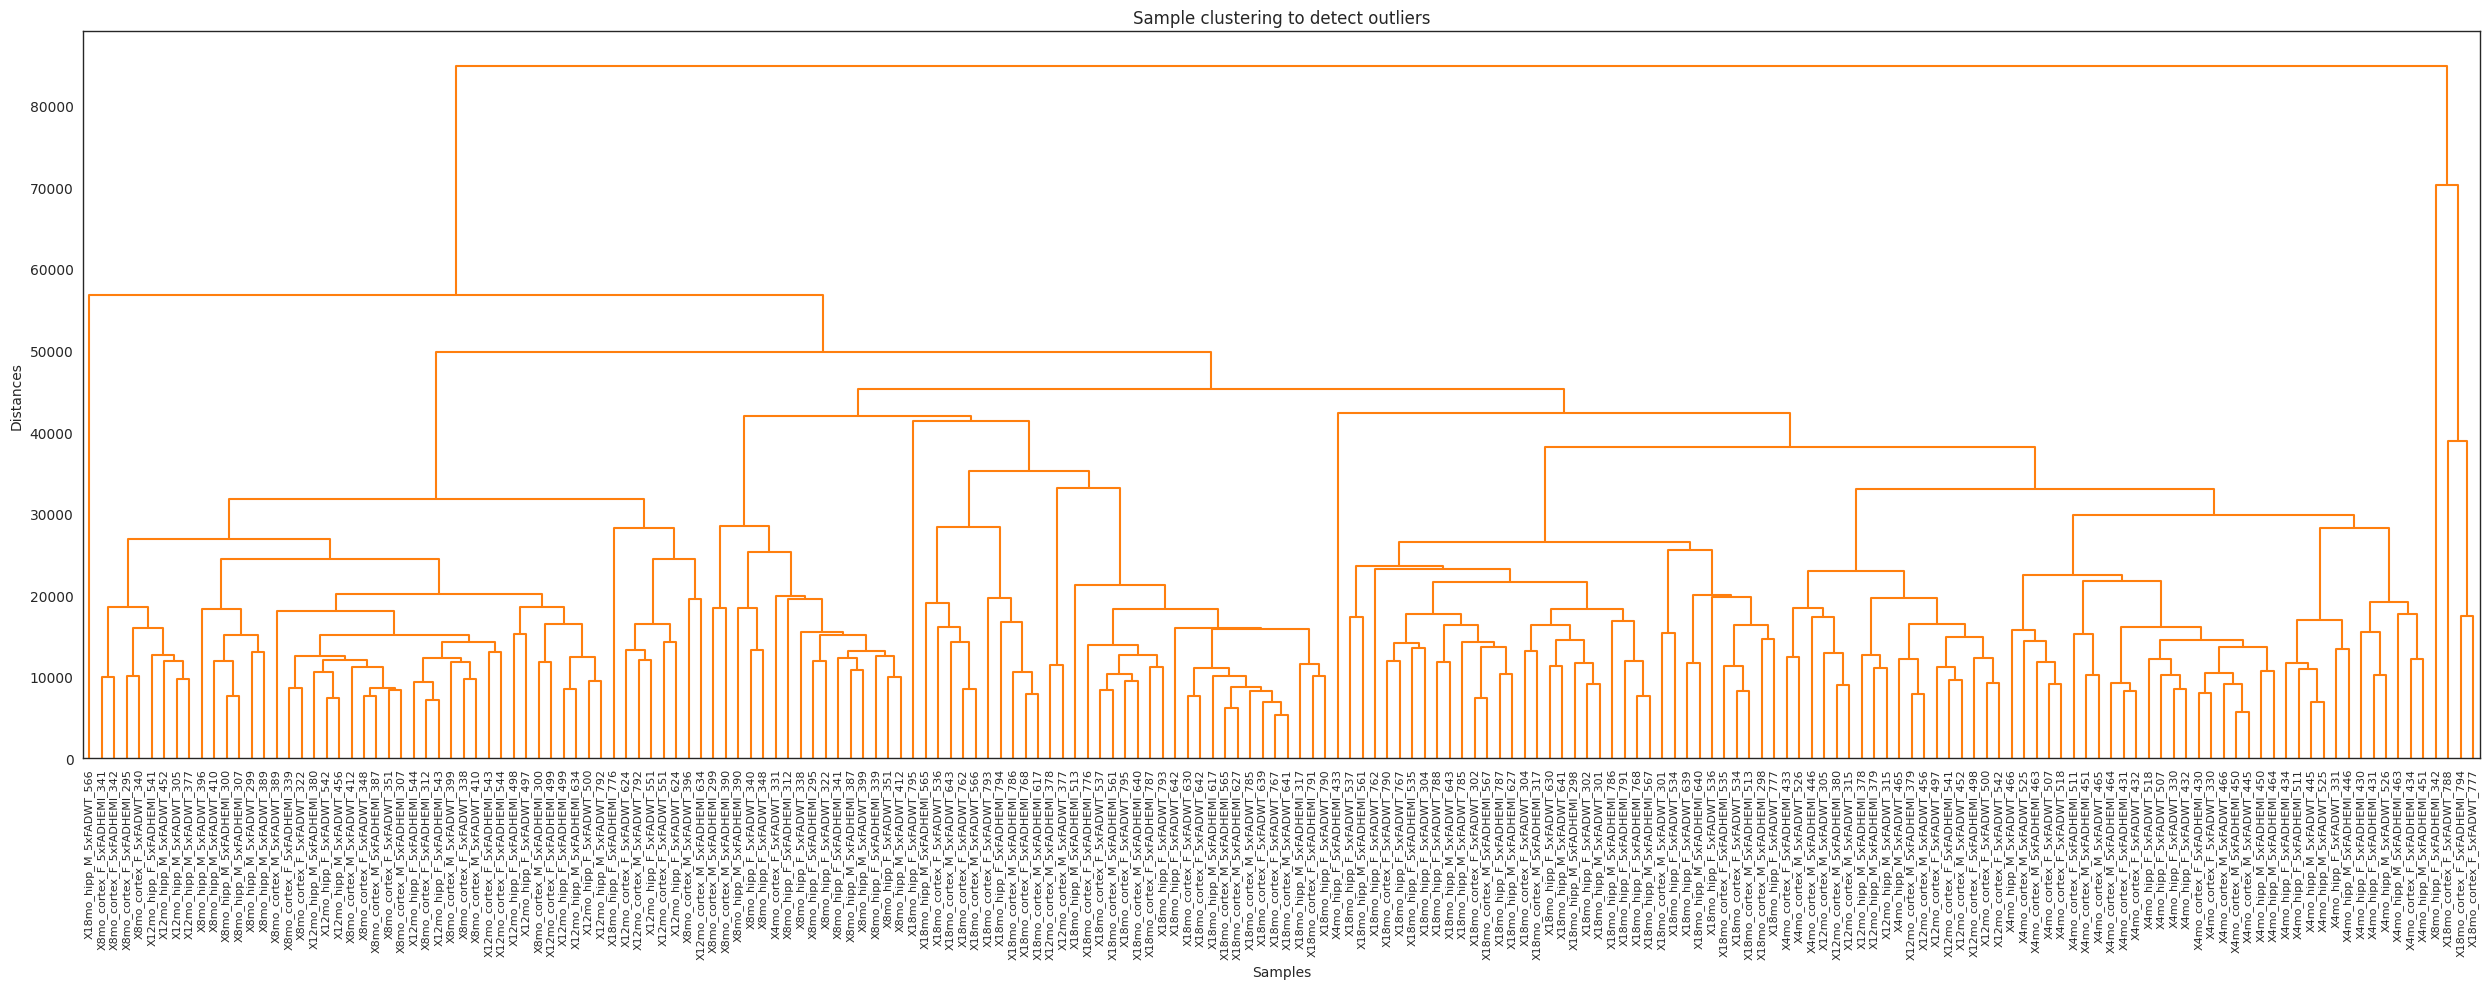

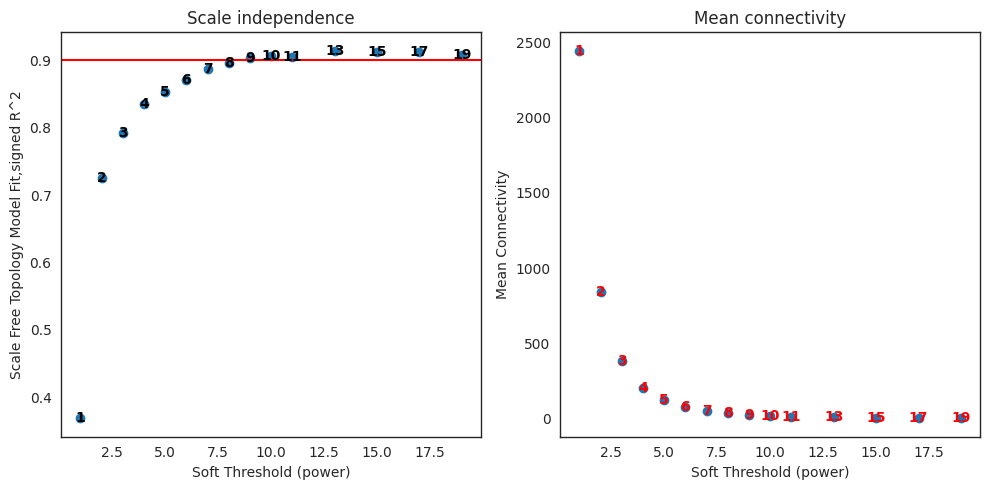

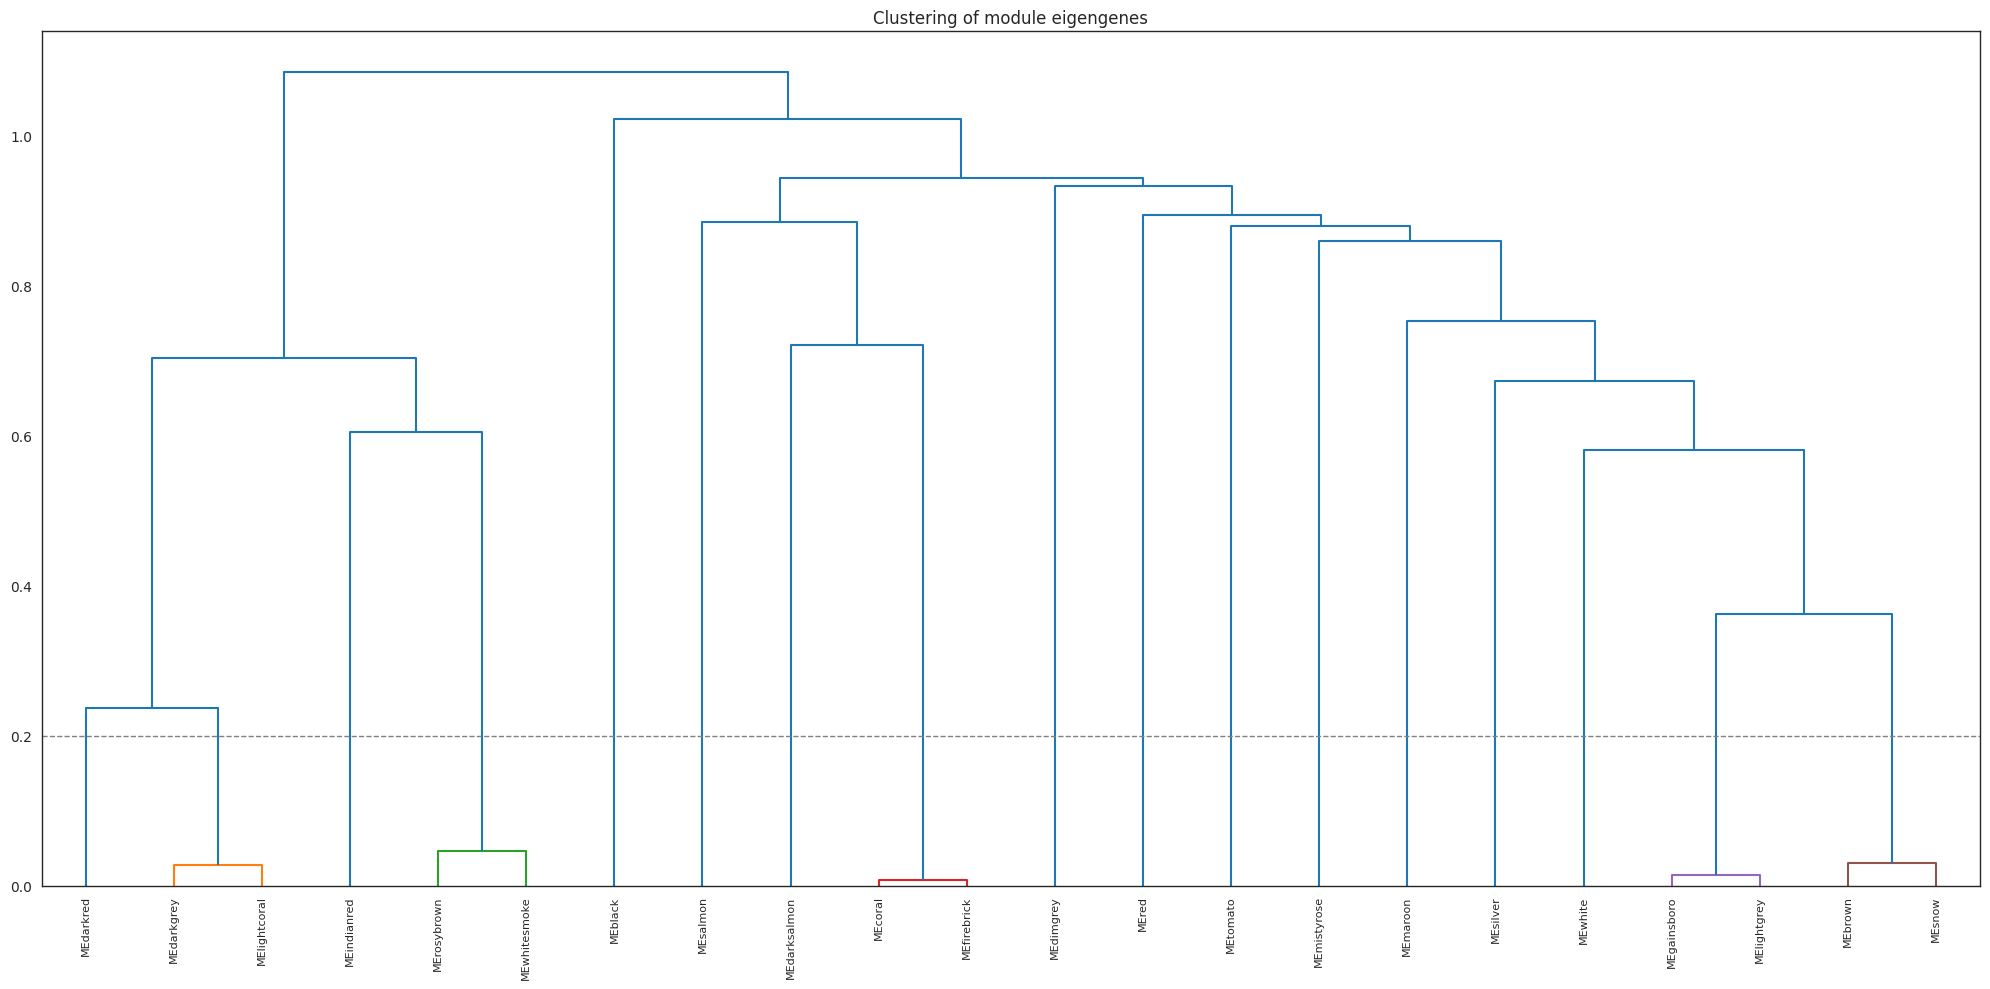

In [2]:
pyWGCNA_5xFAD.runWGCNA()

In [4]:
pyWGCNA_5xFAD.TOM>0.15

,ENSMUSG00000000028,ENSMUSG00000000049,ENSMUSG00000000056,ENSMUSG00000000058,ENSMUSG00000000078,ENSMUSG00000000085,ENSMUSG00000000088,ENSMUSG00000000120,ENSMUSG00000000125,ENSMUSG00000000126,...,ENSMUSG00000118346,ENSMUSG00000118353,ENSMUSG00000118369,ENSMUSG00000118370,ENSMUSG00000118371,ENSMUSG00000118372,ENSMUSG00000118380,ENSMUSG00000118382,ENSMUSG00000118383,ENSMUSG00000118385
ENSMUSG00000000028,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ENSMUSG00000000049,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ENSMUSG00000000056,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ENSMUSG00000000058,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ENSMUSG00000000078,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000118372,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
ENSMUSG00000118380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
ENSMUSG00000118382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
ENSMUSG00000118383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
pyWGCNA_5xFAD.adjacency.shape

(23844, 23844)

In [13]:
pyWGCNA_5xFAD.dynamicMods

[None]

In [11]:
dir(pyWGCNA_5xFAD)

['CalculateSignedKME',
 'CoexpressionModulePlot',
 'MEDissThres',
 'MEs',
 'MeanCut',
 'PPI_network',
 'RsquaredCut',
 'TOM',
 'TOMType',
 'TOMsimilarity',
 'TPMcutoff',
 'TomSimilarityFromAdj',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'adjacency',
 'analyseWGCNA',
 'barplotModuleEigenGene',
 'calBlockSize',
 'checkAdjMat',
 'checkAndScaleWeights',
 'checkSets',
 'checkSimilarity',
 'clustOrder',
 'consensusMEDissimilarity',
 'consensusMEDissimilarityMajor',
 'consensusOrderMEs',
 'coreSizeFunc',
 'cut',
 'cutree',
 'cutreeHybrid',
 'datExpr',
 'datME',
 'dynamicMods',
 'equalizeQuantilesFun',
 'figureType',
 'findModules',
 'fixDataStructure',


## 基因网络的构建和模块的识别

PyWGCNA将网络构建和模块检测的所有步骤压缩到一个名为`findModules`的函数中，该函数执行以下步骤：               
1. 选择软阈值Power：网络拓扑分析                  
2. 共表达相似性和邻接性    
3. 拓扑重叠矩阵（TOM）      
4. 使用TOM进行聚类    
5. 合并表达式配置文件非常相似的模块      

In [3]:
pyWGCNA_5xFAD.findModules()

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1876



我们还可以通过调用`runWGCNA（）`函数来合并前面的两个步骤。
### 更新样本信息并为其分配颜色以进行下游分析

In [ ]:
pyWGCNA_5xFAD.updateSampleInfo(path='5xFAD_paper/sampleInfo.csv', sep=',')

# add color for metadata
pyWGCNA_5xFAD.setMetadataColor('Sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_5xFAD.setMetadataColor('Genotype', {'5xFADWT': 'darkviolet',
                                            '5xFADHEMI': 'deeppink'})
pyWGCNA_5xFAD.setMetadataColor('Age', {'4mon': 'thistle',
                                       '8mon': 'plum',
                                       '12mon': 'violet',
                                       '18mon': 'purple'})
pyWGCNA_5xFAD.setMetadataColor('Tissue', {'Hippocampus': 'red',
                                          'Cortex': 'blue'})

### Updating gene information

特别是添加基因名称进行下游分析

In [ ]:
geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                               attributes=['ensembl_gene_id', 
                                           'external_gene_name', 
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'])




In [ ]:
geneList

In [ ]:
pyWGCNA_5xFAD.updateGeneInfo(geneList)

**note**: 为了进行下游分析，我们搁置了格雷模块，格雷模块是无法分配给任何其他模块的基因集合。

## 将模块与外部信息联系起来并识别重要基因
PyWGCNA在识别`analyseWGCNA（）`函数中的模块后收集了一些重要分析，包括：
1.量化模块-特质关系
2.基因与性状和模块的

在开始分析之前，请记住添加任何样本或基因信息。

为了显示模块关系热图，PyWGCNA需要用户从[Matplotlib colors]中选择和设置颜色(https://matplotlib.org/stable/gallery/color/named_colors.html)使用`setMetadataColor（）`函数获取元数据。
您还可以选择要在模块特征基因热图中按顺序显示的数据特征

In [ ]:
pyWGCNA_5xFAD.analyseWGCNA()

## 保存和加载您的PyWGCNA
您可以分别使用`saveWGCNA（）`或`readWGCNA`函数保存或加载PyWGCNA对象。

In [ ]:
pyWGCNA_5xFAD.saveWGCNA()

您还可以使用`readWGCNA（）`函数加载PyWGCNA对象。您可以从[Zendo]下载`5xFAD.p`(https://zenodo.org/record/6672453#.YrDS4LnMJhE).

In [ ]:
import PyWGCNA
pyWGCNA_5xFAD = PyWGCNA.readWGCNA("5xFAD.p")

## 为每个模块寻找中心基因
您还可以通过使用`top_nhub_genes（）`函数，根据每个模块中的hub基因的连接性来询问它们。
它将为您提供按连接性排序的数据帧，其中包含您在表达数据中的其他基因信息。

In [ ]:
import numpy as np
modules = np.unique(pyWGCNA_5xFAD.datExpr.var['moduleColors']).tolist()

In [ ]:
modules

In [ ]:
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="coral", n=10)